In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/DigitalSuYee/Predicting-Customer-Visitor-Type/main/online_shoppers_intention.csv'

In [3]:
!wget $data -O midterm-project.csv

--2023-11-06 23:10:48--  https://raw.githubusercontent.com/DigitalSuYee/Predicting-Customer-Visitor-Type/main/online_shoppers_intention.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1072063 (1.0M) [text/plain]
Saving to: ‘midterm-project.csv’

midterm-project.csv 100%[===================>]   1.02M  --.-KB/s    in 0.07s   

2023-11-06 23:10:48 (15.3 MB/s) - ‘midterm-project.csv’ saved [1072063/1072063]



In [4]:
df = pd.read_csv('midterm-project.csv')
df.head().T

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0.0,0.0,0.0,0.0,0.0
Informational,0,0,0,0,0
Informational_Duration,0.0,0.0,0.0,0.0,0.0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0.0,64.0,0.0,2.666667,627.5
BounceRates,0.2,0.0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0.0,0.0,0.0,0.0,0.0
SpecialDay,0.0,0.0,0.0,0.0,0.0


##Data Overview

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')



In [6]:
columns_to_drop = ['month', 'visitortype', 'weekend', 'revenue']
data_numeric = df.drop(columns_to_drop, axis=1)
data_numeric.describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems,browser,region,traffictype
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


##Data Summary

In [33]:
df.shape

(12330, 18)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           12330 non-null  int64  
 1   administrative_duration  12330 non-null  float64
 2   informational            12330 non-null  int64  
 3   informational_duration   12330 non-null  float64
 4   productrelated           12330 non-null  int64  
 5   productrelated_duration  12330 non-null  float64
 6   bouncerates              12330 non-null  float64
 7   exitrates                12330 non-null  float64
 8   pagevalues               12330 non-null  float64
 9   specialday               12330 non-null  float64
 10  month                    12330 non-null  object 
 11  operatingsystems         12330 non-null  int64  
 12  browser                  12330 non-null  int64  
 13  region                   12330 non-null  int64  
 14  traffictype           

In [35]:
df.nunique()

administrative               27
administrative_duration    3335
informational                17
informational_duration     1258
productrelated              311
productrelated_duration    9551
bouncerates                1872
exitrates                  4777
pagevalues                 2704
specialday                    6
month                        10
operatingsystems              8
browser                      13
region                        9
traffictype                  20
visitortype                   3
weekend                       2
revenue                       2
dtype: int64

##Missing Data Analysis

In [36]:
df.isna().sum()

administrative             0
administrative_duration    0
informational              0
informational_duration     0
productrelated             0
productrelated_duration    0
bouncerates                0
exitrates                  0
pagevalues                 0
specialday                 0
month                      0
operatingsystems           0
browser                    0
region                     0
traffictype                0
visitortype                0
weekend                    0
revenue                    0
dtype: int64

##Correlation Analysis

In [7]:
data_numeric.corr()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems,browser,region,traffictype
administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561
administrative_duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376
informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491
informational_duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675
productrelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064
productrelated_duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377
bouncerates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286
exitrates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616
pagevalues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532
specialday,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301


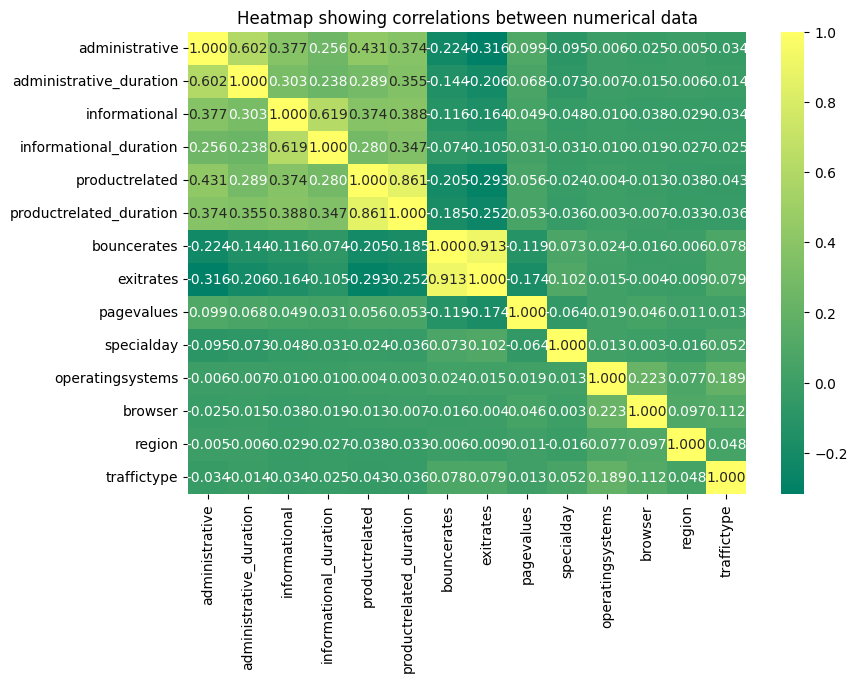

In [8]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [32]:
data_numeric.corr().unstack().sort_values(ascending = False)

administrative           administrative             1.000000
administrative_duration  administrative_duration    1.000000
region                   region                     1.000000
browser                  browser                    1.000000
operatingsystems         operatingsystems           1.000000
                                                      ...   
exitrates                productrelated_duration   -0.251984
                         productrelated            -0.292526
productrelated           exitrates                 -0.292526
administrative           exitrates                 -0.316483
exitrates                administrative            -0.316483
Length: 196, dtype: float64

##Class Distribution (Target Variable)

In [9]:
revenue = {False: 0, True: 1}
df['revenue'] = df['revenue'].replace(revenue)

In [37]:
df['revenue'].value_counts()

0    10422
1     1908
Name: revenue, dtype: int64

## Train Test Splitting

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
y_test = df_test.revenue.values

In [11]:
categorical = ['month', 'visitortype', 'weekend']

numerical = [
    'administrative',
    'administrative_duration',
    'informational',
    'informational_duration',
    'productrelated',
    'productrelated_duration',
    'bouncerates',
    'exitrates',
    'pagevalues',
    'specialday',
    'operatingsystems',
    'browser',
    'region',
    'traffictype',
]

## Modeling

In [12]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    # Create a StandardScaler and scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [13]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

##Cross Validation and Parameter Tunning

In [14]:
C = 0.01
n_splits = 5

In [15]:
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.revenue.values
    y_val = df_val.revenue.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01 0.671 +- 0.024


In [16]:
scores

[0.7071906297029098,
 0.638073615538587,
 0.6853480131316904,
 0.6554206350745835,
 0.6670842353627983]

##Model Testing


In [17]:
dv, model = train(df_full_train, df_full_train.revenue.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.6607551541357688

In [18]:
import pickle

In [19]:
output_file = f'model_C={C}.bin'

In [20]:
output_file

'model_C=0.01.bin'

In [21]:
f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()

In [22]:
!ls -lh *.bin

-rw-r--r-- 1 root root 1.7K Nov  6 23:10 'model_C=0.01.bin'


In [23]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [24]:
import pickle

In [25]:
input_file = 'model_C=0.01.bin'

In [26]:
with open(input_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [27]:
model

LogisticRegression(max_iter=1000)

In [28]:
user = {
'administrative': 0,
'administrative_duration': 0.0,
'informational': 0,
'informational_duration': 0.0,
'productrelated': 1,
'productrelated_duration': 0.000000,
'bouncerates': 0.200000,
'exitrates': 0.200000,
'pagevalues': 0.000000,
'specialday': 0.0,
'month': 'Feb',
'operatingsystems': 1,
'browser': 1,
'region': 1,
'trafiictype': 1,
'visitortype': 'Returning_Visitor',
'weekend': 'False'
}

In [29]:
X = dv.transform([user])

In [30]:
y_pred = model.predict_proba(X)[0, 1]

In [31]:
print('input:', user)
print('output:', y_pred)

input: {'administrative': 0, 'administrative_duration': 0.0, 'informational': 0, 'informational_duration': 0.0, 'productrelated': 1, 'productrelated_duration': 0.0, 'bouncerates': 0.2, 'exitrates': 0.2, 'pagevalues': 0.0, 'specialday': 0.0, 'month': 'Feb', 'operatingsystems': 1, 'browser': 1, 'region': 1, 'trafiictype': 1, 'visitortype': 'Returning_Visitor', 'weekend': 'False'}
output: 0.08539165646877821
